# Build PSF model

In [ ]:
# from psfsynth import *
# run_psf_synth_mag_all(1-2, 4-8)

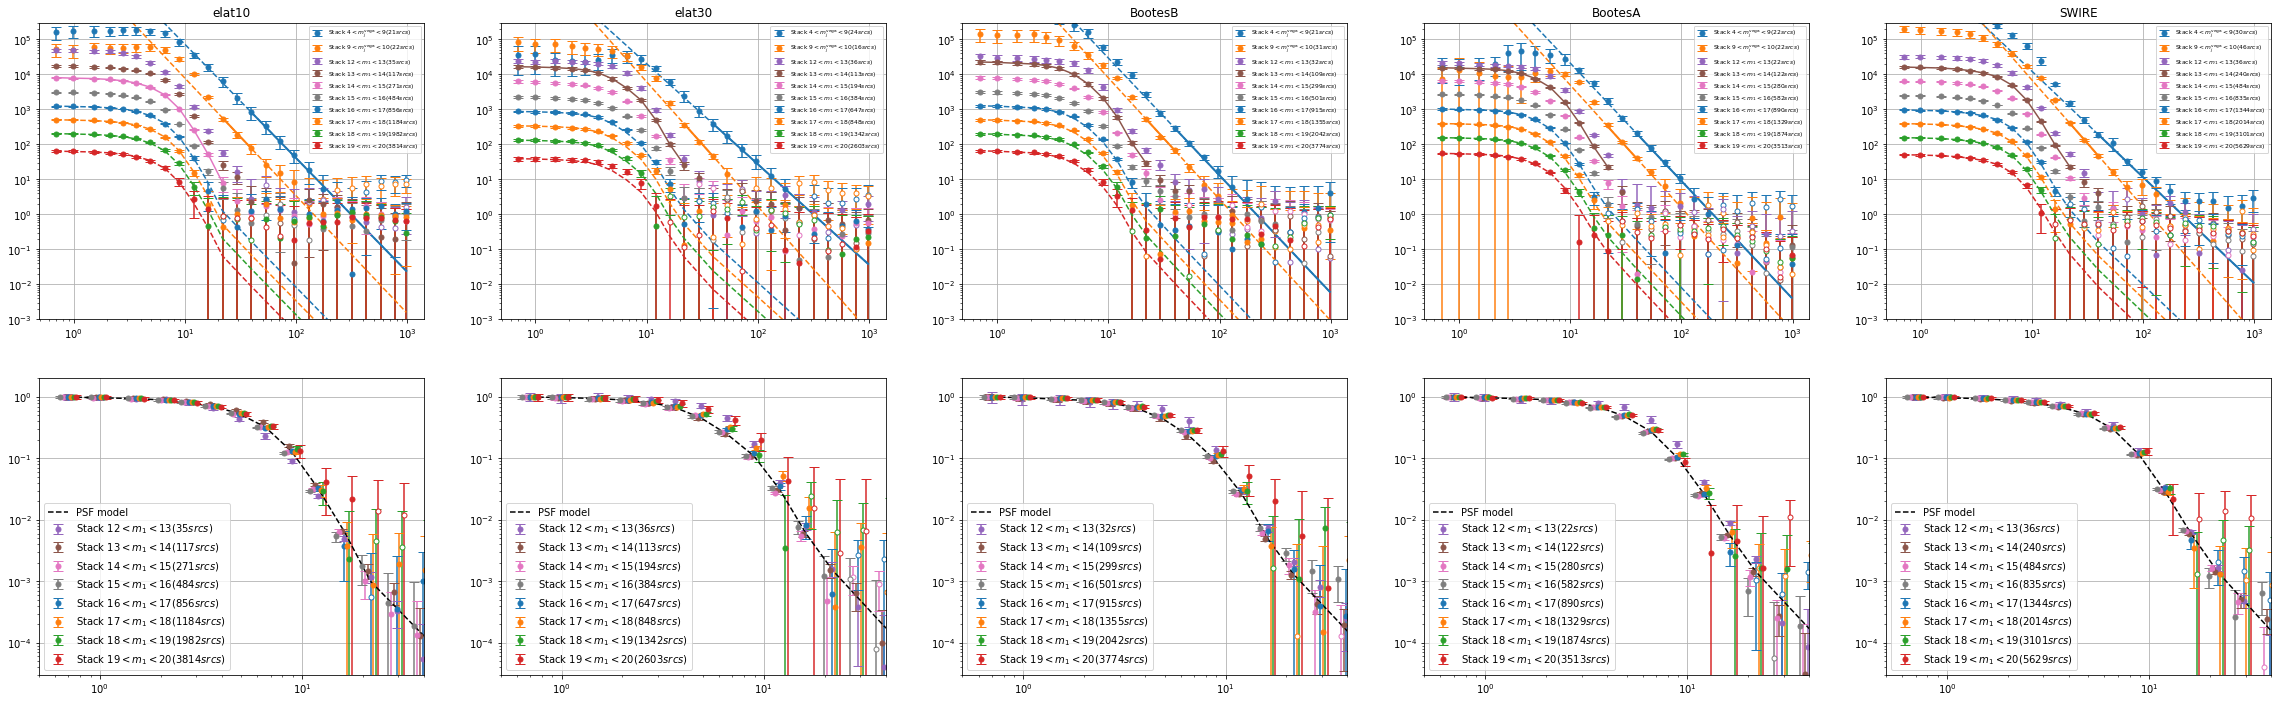

In [123]:
from psfsynth import *

psfmodel ={}
inst = 1
profc = np.zeros(25)
fig, ax = plt.subplots(2, 5, figsize = (40,12))
for i, ifield in enumerate([4,5,6,7,8]):
    for im,(m_min, m_max) in enumerate(zip([4,9], [9,10])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_j^{\rm vega} <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        if m_min==4:
            slope_out = np.polyfit(np.log10(profdat['rbins'][11:17]),
                               np.log10(profdat['profcb'][11:17]),1)[0]
            proffit = 10 ** (slope_out * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][13:], proffit[13:], color='C'+str(im), lw=2)
            profc[13:] = proffit[13:]
        if m_min == 9:
            slope_mid = np.polyfit(np.log10(profdat['rbins'][11:15]),
                               np.log10(profdat['profcb'][11:15]),1)[0]
            proffit = 10 ** (slope_mid * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][11:14], proffit[11:14], color='C'+str(im), lw=2)
            profc[11:14] = proffit[11:14] / proffit[13] * profc[13]
            
    for im,(m_min, m_max) in enumerate(zip([12,13,14,15], [13,14,15,16])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im+4), 
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        plot_err_log(profdat['rbins']*(1-im*0.03), 
                     profdat['profcb']/profdat['profcb'][0],
                     profdat['profcb_err']/profdat['profcb'][0],
                     ax=ax[1][i], color='C'+str(im+4), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))
        if inst ==1 and ifield==4:
            if m_min==14:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]
        elif inst==1:
            if m_min==13:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]            
        elif inst == 2:
            if m_min==14:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]         
            
    profc /= profc[0]
    psfmodel[ifield] = profc
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) + \
    '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        plot_err_log(profdat['rbins'], 
                     profdat[im]['profcb'],
                     profdat[im]['profcb_err'],plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat[im]['Nsrc']))
        plot_err_log(profdat['rbins']*(1+im*0.03), 
                     profdat[im]['profcb']/profdat[im]['profcb'][0],
                     profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                     ax=ax[1][i], color='C'+str(im), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat[im]['Nsrc']))
        
        ax[0][i].loglog(profdat['rbins'], profc*profdat[im]['profcb'][0],color='C'+str(im),ls='--')
    ax[1][i].loglog(profdat['rbins'], profc,color='k',ls='--', label='PSF model')
        
    ax[0][i].set_title(fieldnamedict[ifield])
    ax[0][i].legend(fontsize=6)
    ax[0][i].set_ylim([1e-3,3e5])
    ax[1][i].legend()
    ax[0][i].grid()
    ax[1][i].grid()
    ax[1][i].set_ylim([3e-5,2])
    ax[1][i].set_xlim([5e-1,40])
#     plt.savefig('/Users/ytcheng/Desktop/star_stack.png', dpi = 100, bbox_inches='tight')

# Gaia

Gaia documentation

https://gea.esac.esa.int/archive/documentation/GDR2/pdf/GaiaDR2_documentation_1.2.pdf

Sec.14.1 (p.521): catalog entry definition

Gaia astrometry uncertainty ~ 0.1-1 mas https://gea.esac.esa.int/archive/documentation/GDR2/

PanSTARRS astrometry uncertainty ~ 2 mas https://arxiv.org/pdf/1612.05560.pdf (Sec.5.1)

CIBER subpixel = 0.7 arcsec = 700 mas

### process Gaia raw data

In [60]:
# from utils import *
# for ifield in [4,5,6,7,8]:
#     catdir = mypaths['ciberdir'] + 'doc/20170617_Stacking/maps/gaiacats/'
#     df = pd.read_csv(catdir + fieldnamedict[ifield] + '.csv')
#     dfg = pd.read_csv(catdir + fieldnamedict[ifield] + '_galQSO.csv')
#     dfg = dfg.rename(columns={'ra': 'raGDR2', 'dec': 'decGDR2'})
#     df = df.join(dfg, lsuffix='source_id', rsuffix='GDR2')
#     df.drop(columns=['GDR2', 'raGDR2','decGDR2'],inplace=True)

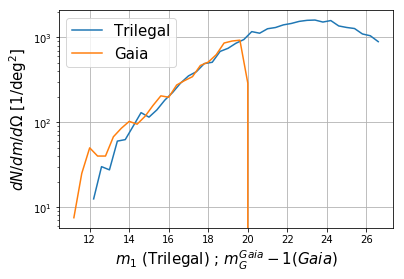

In [23]:
# Trilegal vs Gaia counts

ifield = 4
df = pd.read_csv('/Users/ytcheng/ciber/doc/20170617_Stacking/maps/trilegal/%s.csv'%fieldnamedict[ifield])
df = df[(df['x']>0) & (df['x']<512) & (df['y']>0) & (df['y']<512)]
mbinedges = np.arange(12,27,0.4)
mbins = (mbinedges[1:] + mbinedges[:-1]) / 2
dm = mbinedges[1] - mbinedges[0]
N = np.histogram(df['I'],bins=mbinedges)[0]
plt.semilogy(mbins, N/dm, label='Trilegal')

df = pd.read_csv(mypaths['GAIAcatdat'] + fieldnamedict[ifield] + '.csv')
df = df[(df['x1']>0) & (df['x1']<512) & (df['y1']>0) & (df['y1']<512)]
df = df[df['parallax']==df['parallax']]
N = np.histogram(df['phot_g_mean_mag'],bins=mbinedges)[0]
plt.semilogy(mbins-1, N/dm, label='Gaia')

plt.xlabel('$m_1$ (Trilegal) ; $m_G^{Gaia}-1 (Gaia)$',fontsize=15)
plt.ylabel(r'$dN/dm/d\Omega$ [1/deg$^2$]',fontsize=15)
plt.grid()
plt.legend(fontsize=15)

# How many SDSS galaxy are close to Gaia source?

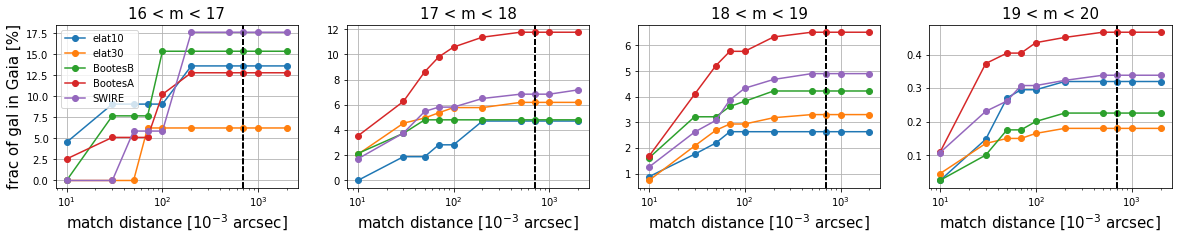

In [154]:
from stack_ancillary import *
from scipy.spatial import cKDTree
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

inst = 1
fig, ax = plt.subplots(1, 4, figsize = (20,3))
for ifield in [4,5,6,7,8]:
    mask_inst1, mask_inst2 = \
    load_processed_images(data_maps, return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])

    dfg = pd.read_csv(mypaths['GAIAcatdat'] + fieldnamedict[ifield] + '.csv')
    dfg = dfg[dfg['parallax']==dfg['parallax']]
    catalogg = (dfg[['ra','dec']].values * np.pi/180).tolist()
    psg = [[item[0], item[1]] for item in catalogg]

    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        srcdat = ps_src_select(inst, ifield, m_min, m_max, 
            [mask_inst1, mask_inst2], gaia_match=False, sample_type='all')
        dfp = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
        dfp = dfp.iloc[srcdat['idxg_arr']]
        catalogp = (dfp[['ra','dec']].values * np.pi/180).tolist()
        psp = [[item[0], item[1]] for item in catalogp]
        kdt = cKDTree(psg)

        fmatch_arr = []
        tol_mas_arr = [10,30,50,70,100,200,500,700,1000,2000]
        for tol_mas in tol_mas_arr:
            tolerance = (tol_mas * u.mas).to(u.rad).value
            obj = kdt.query_ball_point(psp, tolerance)
            Nmatch = np.array([len(obj_i) for obj_i in obj])
            fmatch_arr.append(np.sum(Nmatch!=0)/len(Nmatch))
        fmatch_arr = np.array(fmatch_arr)
        ax[im].semilogx(tol_mas_arr,fmatch_arr*100,'o-', label=fieldnamedict[ifield])
        ax[im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
        ax[im].grid()
        ax[im].set_xlabel(r'match distance [$10^{-3}$ arcsec]',fontsize=15)
        ax[im].axvline(700,c='k',ls='--')
    ax[0].legend(loc=2)
    ax[0].set_ylabel('frac of gal in Gaia [%]',fontsize=15)
plt.savefig('/Users/ytcheng/Desktop/gal_gaia_match.png', dpi = 200, bbox_inches='tight')

### Stack PanSTARRS/SDSS with Gaia match

In [ ]:
# from psfsynth import *
# run_psf_synth_mag_all(1-2, 4-8, gaia_match=True, filter_star_svm=True)
# run_psf_synth_mag_all(1-2,4-8, gaia_match=True, filter_star_svm=True, N_neighbor_mask=1)

### Stack Gaia with different src selection criteria

In [2]:
# from psfsynth import *
# run_gaia_test_stack(1-2,4-8,15-20,16-21)

# # stack without selection criteria
# run_psf_synth_mag_all_gaia(1-2, 4-8, np.arange(11,21), np.arange(12,22))

## Gaia Stack PSF consistency test

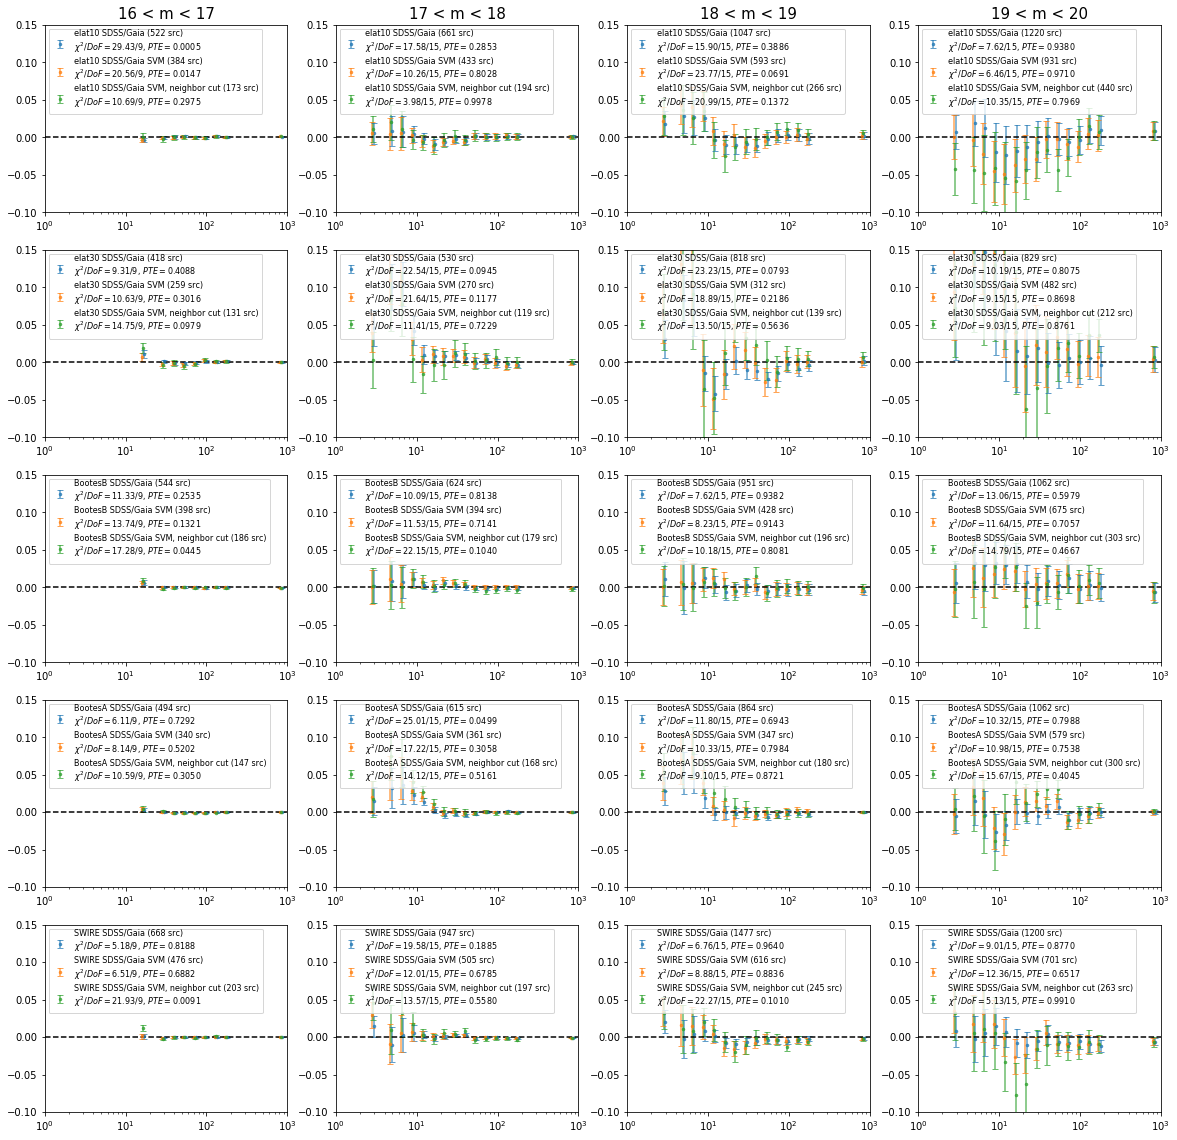

In [7]:
from psfsynth import *

inst =  1
filt_order = filt_order_dict[inst]
fig, ax = plt.subplots(5, 4, figsize = (20,20))

for i, ifield in enumerate([4,5,6,7,8]):
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        
        Nsubbin_head = 12 if im==0 else 6
        subsub = True if im==0 else False
        stackdat = stacking(inst, ifield, m_min, m_max, 
                    load_from_file=True, BGsub=False, subsub=subsub).stackdat
        r_arr = stackdat['rsubbins']
        
        ax[i][im].set_xscale('log')
        ax[i][im].set_xlim([1e0,1e3])
        ax[i][im].set_ylim([-0.1,0.15])

        psfdat = run_psf_combine(inst, ifield, savedata=False)
        psf0 = psfdat[im]['comb']['profcb']
        psfhit = psfdat[im]['comb']['hit']
        psfcov0 = psfdat[im]['comb']['cov']
        psf, psfcov, psfsub, psfcovsub = profile_cov_normalize(psf0, psfcov0, psfhit,
                                                               Nsubbin_head=Nsubbin_head)

        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d_gaia_match.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat1 = pickle.load(f)
        N = profdat1['Nsrc']
        prof = profdat1['profcb']
        hit = profdat1['profhit']
        cov = profdat1['cov']
        prof, cov, profsub, covsub = profile_cov_normalize(prof, cov, hit,
                                                           Nsubbin_head=Nsubbin_head)
        rerr = np.sqrt(np.diag(covsub+psfcovsub))
        D = (profsub - psfsub).reshape(1,-1)
        U,s,VT = np.linalg.svd(covsub+psfcovsub)
        Cinv = VT.T@np.diag(1/s)@U.T
        chi2 = (D@Cinv@D.T) * (64 - len(profsub) - 2) / (64 - 1)        
        pte = scipy.stats.distributions.chi2.sf(chi2, len(profsub))
        ax[i][im].errorbar(r_arr*1.03, profsub - psfsub, rerr,
                           fmt ='.', color='C0', capsize=3, markersize=5, alpha=0.7,
                           label='%s SDSS/Gaia (%d src)'%(fieldnamedict[ifield],N) +\
                           '\n' + r"$\chi^2/DoF=%.2f/%d,\, PTE=%.4f$"%(chi2,len(profsub),pte))
        
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d_gaia_match_svm.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat1 = pickle.load(f)
        N = profdat1['Nsrc']
        prof = profdat1['profcb']
        hit = profdat1['profhit']
        cov = profdat1['cov']
        prof, cov, profsub, covsub = profile_cov_normalize(prof, cov, hit,
                                                           Nsubbin_head=Nsubbin_head)
        rerr = np.sqrt(np.diag(covsub+psfcovsub))
        D = (profsub - psfsub).reshape(1,-1)
        U,s,VT = np.linalg.svd(covsub+psfcovsub)
        Cinv = VT.T@np.diag(1/s)@U.T
        chi2 = (D@Cinv@D.T) * (64 - len(profsub) - 2) / (64 - 1)        
        pte = scipy.stats.distributions.chi2.sf(chi2, len(profsub))
        ax[i][im].errorbar(r_arr*0.97, profsub - psfsub, rerr,
                           fmt ='.', color='C1', capsize=3, markersize=5, alpha=0.7,
                           label='%s SDSS/Gaia SVM (%d src)'%(fieldnamedict[ifield],N) +\
                           '\n' + r"$\chi^2/DoF=%.2f/%d,\, PTE=%.4f$"%(chi2,len(profsub),pte))        

        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d_gaia_match_svm_Nneighbor1.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat1 = pickle.load(f)
        N = profdat1['Nsrc']
        prof = profdat1['profcb']
        hit = profdat1['profhit']
        cov = profdat1['cov']
        prof, cov, profsub, covsub = profile_cov_normalize(prof, cov, hit,
                                                           Nsubbin_head=Nsubbin_head)
        rerr = np.sqrt(np.diag(covsub+psfcovsub))
        D = (profsub - psfsub).reshape(1,-1)
        U,s,VT = np.linalg.svd(covsub+psfcovsub)
        Cinv = VT.T@np.diag(1/s)@U.T
        chi2 = (D@Cinv@D.T) * (64 - len(profsub) - 2) / (64 - 1)        
        pte = scipy.stats.distributions.chi2.sf(chi2, len(profsub))
        ax[i][im].errorbar(r_arr, profsub - psfsub, rerr,
                           fmt ='.', color='C2', capsize=3, markersize=5, alpha=0.7,
                           label='%s SDSS/Gaia SVM, neighbor cut (%d src)'%(fieldnamedict[ifield],N) +\
                           '\n' + r"$\chi^2/DoF=%.2f/%d,\, PTE=%.4f$"%(chi2,len(profsub),pte))        
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
        ax[i][im].axhline(0,c='k',ls='--')
        ax[i][im].legend(loc=2, fontsize=8)

plt.savefig('/Users/ytcheng/Desktop/PS_stack_filter_TM%d.png'%(inst), 
            dpi = 200, bbox_inches='tight')

## Visualize Match + SVM cut

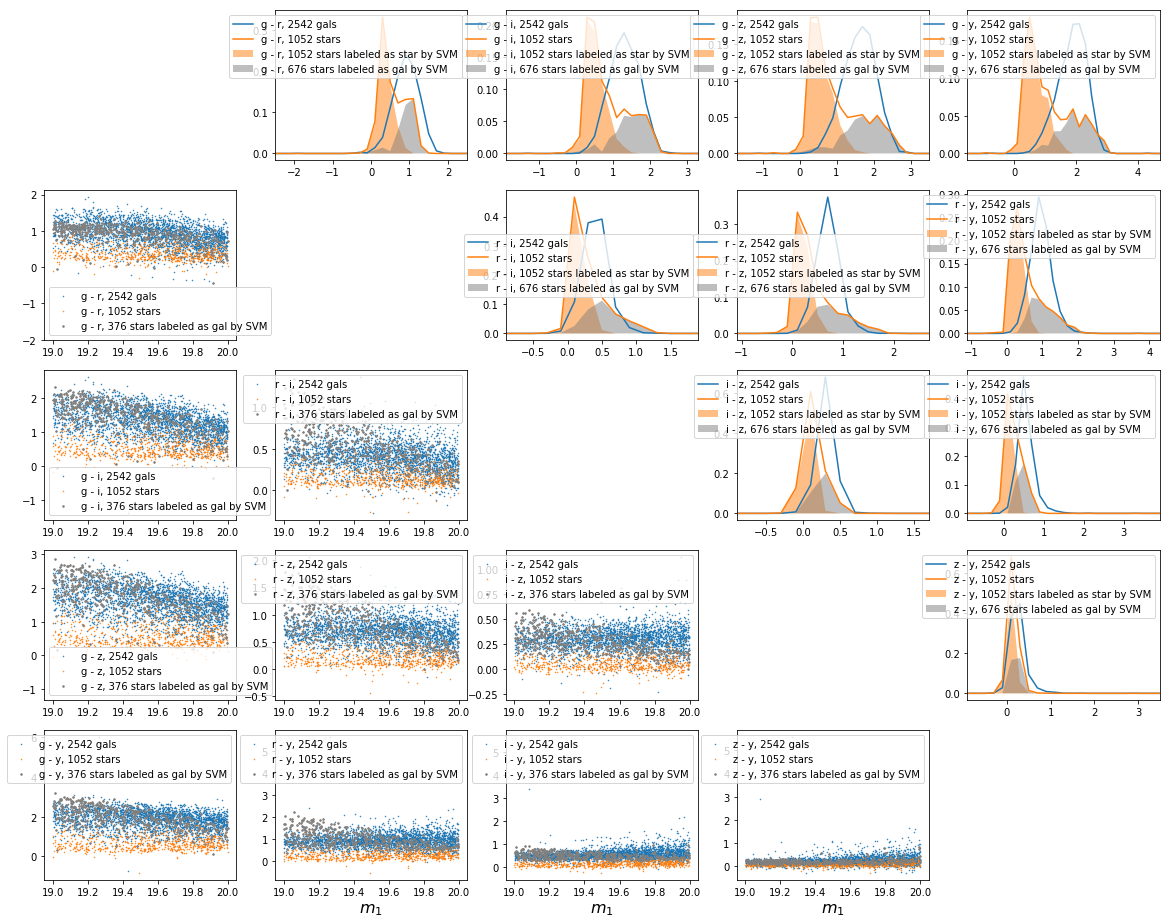

In [39]:
from stack_ancillary import *
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

inst =  1
filt_order = filt_order_dict[inst]
ifield = 6

mask_inst1, mask_inst2 = \
load_processed_images(data_maps, return_names=[(1,ifield,'mask_inst'),
                                   (2,ifield,'mask_inst')])

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    srcdat = ps_src_select(inst, ifield, m_min, m_max, 
        [mask_inst1, mask_inst2], gaia_match=True, sample_type='all')
    df = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
    
    idxs_arr = srcdat['idxs_arr']
    dfs = df.iloc[idxs_arr]
    sps = np.where((dfs['gMeanPSFMag']>0) & (dfs['rMeanPSFMag']>0)\
                   & (dfs['iMeanPSFMag']>0) & (dfs['zMeanPSFMag']>0)\
                   & (dfs['yMeanPSFMag']>0))[0]
    idxs_arr = idxs_arr[sps]
    dfs = dfs.iloc[sps]
    
    idxg_arr = srcdat['idxg_arr']
    dfg = df.iloc[idxg_arr]
    spg = np.where((dfg['gMeanPSFMag']>0) & (dfg['rMeanPSFMag']>0)\
                   & (dfg['iMeanPSFMag']>0) & (dfg['zMeanPSFMag']>0)\
                   & (dfg['yMeanPSFMag']>0))[0]
    dfg = dfg.iloc[spg]
    idxg_arr = idxg_arr[spg]
    
    srcdat_svm = ps_src_select(inst, ifield, m_min, m_max, 
        [mask_inst1, mask_inst2], gaia_match=True, sample_type='all',filter_star_svm=True)
    idxs_rej = np.array([i for i in idxs_arr if i not in srcdat_svm['idxs_arr']])
    dfs_svm = df.iloc[idxs_rej]
    
    plt.close()
    fig, ax = plt.subplots(5, 5, figsize = (20,16))
    for i,c1 in enumerate(['g','r','i','z','y']):
        for j,c2 in enumerate(['g','r','i','z','y']):
            if i>=j:
                ax[i][i].axis('off')
                continue
            m_arr = dfg['I_comb'].values
            c_arr = dfg[c1+'MeanPSFMag'].values - dfg[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            h_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hg_arr = h_arr / len(dfg)
            ax[i][j].plot(hbins, hg_arr, 'C0', label='%s - %s, %d gals'%(c1,c2,len(dfg)))
            ax[j][i].plot(m_arr, c_arr,'.',markersize=1, label='%s - %s, %d gals'%(c1,c2,len(dfg)))

            m_arr = dfs['I_comb'].values
            c_arr = dfs[c1+'MeanPSFMag'].values - dfs[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            h_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hs_arr = h_arr / len(dfs)
            ax[j][i].plot(m_arr, c_arr,'.',markersize=1, label='%s - %s, %d stars'%(c1,c2,len(dfs)))
            
            m_arr = dfs_svm['I_comb'].values
            c_arr = dfs_svm[c1+'MeanPSFMag'].values - dfs_svm[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            hr_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hr_arr = hr_arr / len(dfs)

            ax[i][j].plot(hbins, hs_arr, 'C1', 
                          label='%s - %s, %d stars'%(c1,c2,len(dfs)))
            ax[i][j].fill(hbins, hs_arr-hr_arr, 'C1', alpha=0.5, 
                          label='%s - %s, %d stars labeled as star by SVM'%(c1,c2,len(dfs)))
            ax[i][j].fill(hbins, hr_arr, 'grey', alpha=0.5,
                          label='%s - %s, %d stars labeled as gal by SVM'%(c1,c2,len(dfs)-len(dfs_svm)))
            
            ax[j][i].plot(m_arr, c_arr,'.',c='grey',markersize=3,
                          label='%s - %s, %d stars labeled as gal by SVM'%(c1,c2,len(dfs_svm)))
            
            sp = np.where((hg_arr + hs_arr)!=0)[0]
            xmin = hbins[np.max([sp[0]-3,0])]
            xmax = hbins[np.min([sp[-1]+3,len(hbins)-1])]
            ax[i][j].set_xlim([xmin,xmax])
            ax[i][j].legend()
            ax[j][i].legend()
            ax[-1][j].set_xlabel('$m_1$', fontsize=16)
            
    plt.savefig('/Users/ytcheng/Desktop/PS_gaia_color_%d_%d.png'%(m_min,m_max),
                dpi = 200, bbox_inches='tight')

***
# RLD PSF model

band 1 PSF beta model params:

4: (1.755e+00, 5.694e+00, 7.851e-03),
5: (1.542e+00, 4.619e+00, 9.598e-03),
6: (1.525e+00, 4.299e+00, 1.086e-02),
7: (1.529e+00, 4.422e+00, 1.031e-02),
8: (1.593e+00, 4.781e+00, 9.477e-03)

band 2 PSF beta model params:

4: (1.478e+00, 5.284e+00, 6.797e-03),
5: (1.393e+00, 4.835e+00, 7.271e-03),
6: (1.475e+00, 5.181e+00, 7.045e-03),
7: (1.517e+00, 5.342e+00, 6.967e-03),
8: (1.504e+00, 5.282e+00, 7.024e-03)



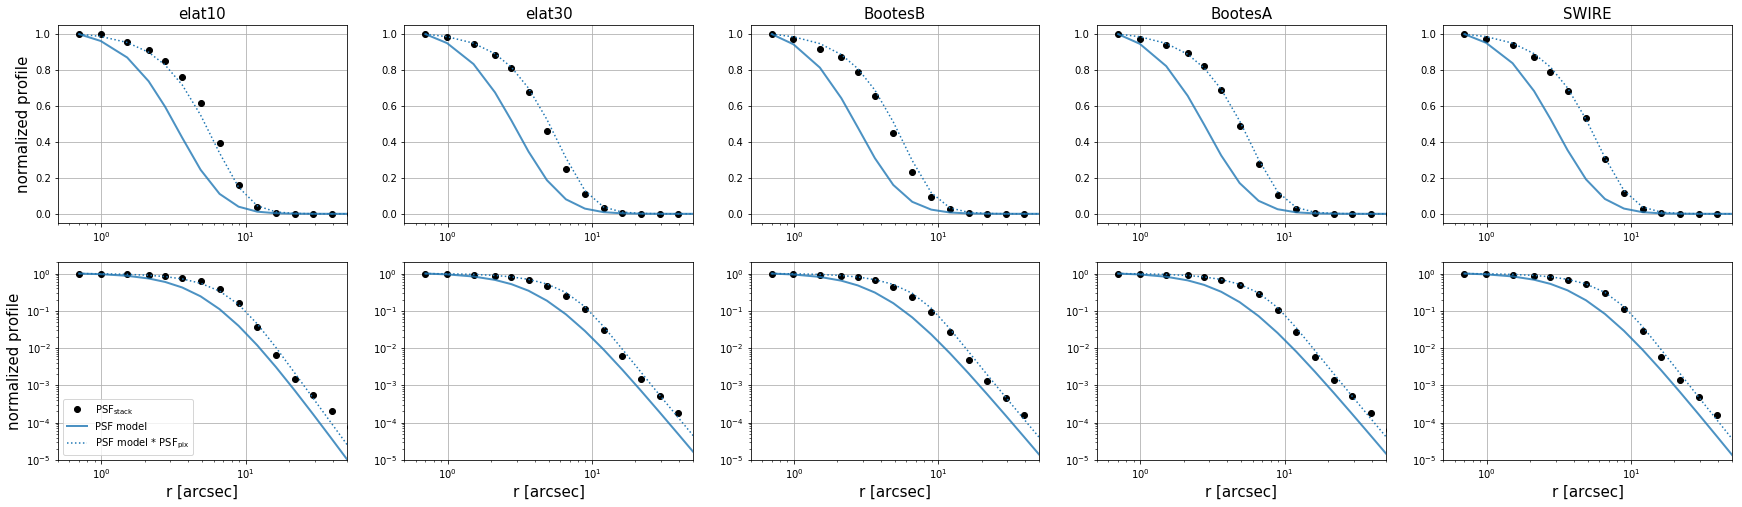

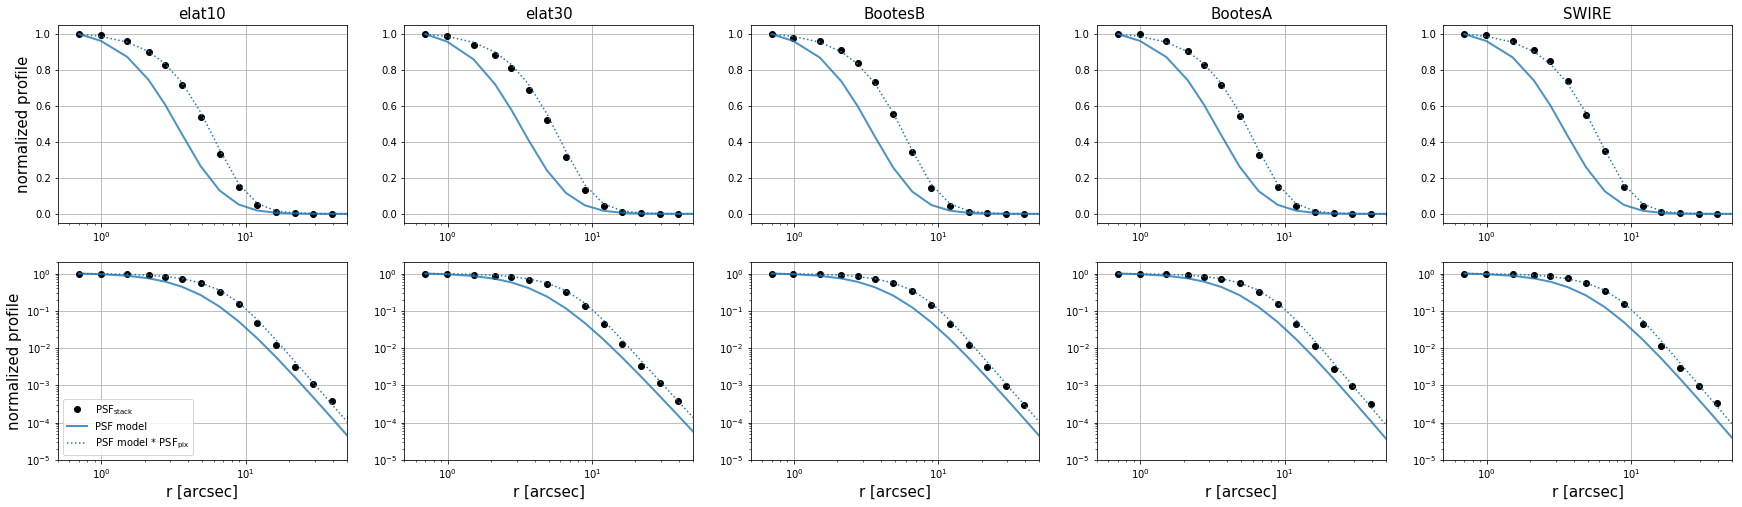

In [1]:
from psfsynth import *
from scipy.optimize import curve_fit

dx = 1200
def beta_function(r, beta, rc, norm):
    return norm * (1 + (r / rc)**2)**(-3.*beta/2)

for inst in [1,2]:
    print('band %d PSF beta model params:\n'%inst)
    pix_map = pix_func_substack()

    fig, ax = plt.subplots(2,5,figsize=(30,8))
    
    for i,ifield in enumerate([4,5,6,7,8]):
        
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
        with open(fname,"rb") as f:
            profdat = pickle.load(f)
            
        radmap = make_radius_map(np.zeros([2*dx+1, 2*dx+1]),dx, dx)*0.7
        stackmap = psf_comb_interpolate(inst, ifield, 0, radmap)
        
        rbins = profdat['rbins']
        psf_map = restoration.richardson_lucy\
        (stackmap/np.sum(stackmap), pix_map, 10)
        psfprof = radial_prof(psf_map)['prof']

        (beta, rc, norm), _ = curve_fit(beta_function, rbins[rbins < 30]
                            ,psfprof[rbins < 30]/psfprof[0], sigma=psfprof[rbins < 30])
        psfprofbeta = beta_function(rbins, beta, rc, norm)

        psf_map_beta = beta_function(radmap, beta, rc, norm)
        norm = norm / np.sum(psf_map_beta)
        psf_map_conv = fftconvolve(psf_map_beta, pix_map, 'same')
        psfprofconv = radial_prof(psf_map_conv)['prof']
    
        print('%d: (%.3e, %.3e, %.3e)'%(ifield ,beta, rc, norm), end='')
        if ifield!=8:
            print(',\n', end='')
        else:
            print('\n\n', end='')
         
        ax[0][i].semilogx(rbins,profdat[0]['comb']['profcb']/profdat[0]['comb']['profcb'][0],
                          'o',lw=2,c='k')
        ax[0][i].semilogx(rbins,psfprofbeta/psfprofbeta[0],'-',lw=2,alpha=0.8,c='C0')
        ax[0][i].semilogx(rbins,psfprofconv/psfprofconv[0],':',c='C0')

        ax[1][i].semilogx(rbins,profdat[0]['comb']['profcb']/profdat[0]['comb']['profcb'][0],
                          'o',lw=2,c='k', label=r'PSF$_{\rm stack}$')
        ax[1][i].semilogx(rbins,psfprofbeta/psfprofbeta[0],
                       lw=2,alpha=0.8,c='C0', label='PSF model')
        ax[1][i].semilogx(rbins,psfprofconv/psfprofconv[0],':',c='C0', label=r'PSF model * PSF$_{\rm pix}$')

        ax[1][i].set_yscale('log')
        ax[0][i].set_xlim([5e-1,50])
        ax[1][i].set_xlim([5e-1,50])
        ax[1][i].set_ylim([1e-5,2])
        ax[0][i].set_title(fieldnamedict[ifield], fontsize=15)
        ax[0][i].grid()
        ax[1][i].grid()
        ax[1][i].set_xlabel('r [arcsec]', fontsize=15)
    ax[0][0].set_ylabel('normalized profile', fontsize=15)
    ax[1][0].set_ylabel('normalized profile', fontsize=15)
    ax[1][0].legend(fontsize=10)
#     plt.savefig('plots/paperfig/psf_rec_TM%d.png'%(inst), dpi = 200, bbox_inches='tight')

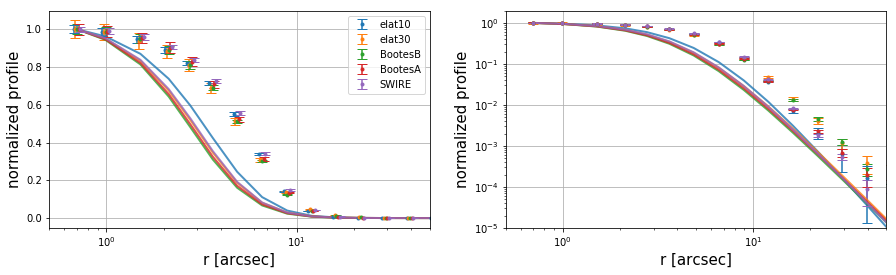

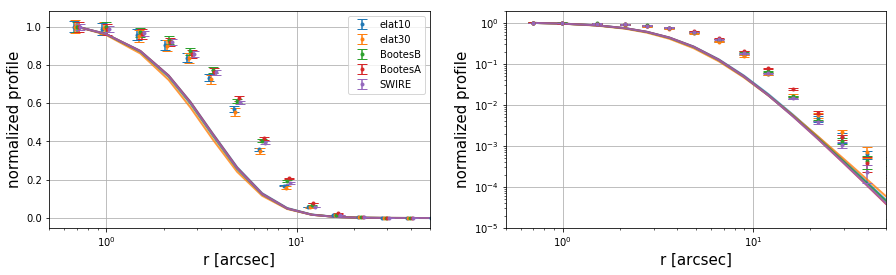

In [1]:
from utils import *

def beta_function(r, beta, rc, norm):
    return norm * (1 + (r / rc)**2)**(-3.*beta/2)
for inst in [1,2]:
    fname = mypaths['alldat'] + 'TM'+ str(inst) + '/psfdata.pkl'
    with open(fname,"rb") as f:
        psfdata = pickle.load(f)

    fig, ax = plt.subplots(1,2,figsize=(15,4))
    for ifield in [4,5,6,7,8]:
        rbins = psfdata[ifield]['rbins']

        beta, rc, norm = PSF_model_dict[inst][ifield]
        psfprofbeta = beta_function(rbins, beta, rc, norm)

        ax[0].errorbar(rbins*(1+(ifield-6)*0.02),
                     psfdata[ifield]['prof']/psfdata[ifield]['prof'][0],
                     psfdata[ifield]['prof_err']/psfdata[ifield]['prof'][0],
                     c='C'+str(ifield-4),fmt ='.', capsize=5, label=fieldnamedict[ifield])
        ax[0].semilogx(rbins,psfprofbeta/psfprofbeta[0],'-',lw=2,alpha=0.8,c='C'+str(ifield-4))

        ax[1].errorbar(rbins,
                     psfdata[ifield]['prof']/psfdata[ifield]['prof'][0],
                     psfdata[ifield]['prof_err']/psfdata[ifield]['prof'][0],
                     c='C'+str(ifield-4),fmt ='.', capsize=5, label='star stack')
        ax[1].semilogx(rbins,psfprofbeta/psfprofbeta[0],
                       lw=2,alpha=0.8,c='C'+str(ifield-4))

    ax[1].set_yscale('log')
    ax[0].set_xlim([5e-1,50])
    ax[1].set_xlim([5e-1,50])
    ax[1].set_ylim([1e-5,2])
    ax[0].grid()
    ax[1].grid()
    ax[0].set_xlabel('r [arcsec]', fontsize=15)
    ax[1].set_xlabel('r [arcsec]', fontsize=15)
    ax[0].set_ylabel('normalized profile', fontsize=15)
    ax[1].set_ylabel('normalized profile', fontsize=15)
    ax[0].legend(fontsize=10)
#     plt.savefig('plots/paperfig/psf_TM%d.pdf'%(inst), dpi = 200, bbox_inches='tight')

***
# Verify Stacking is robust against Nsrc and Noise

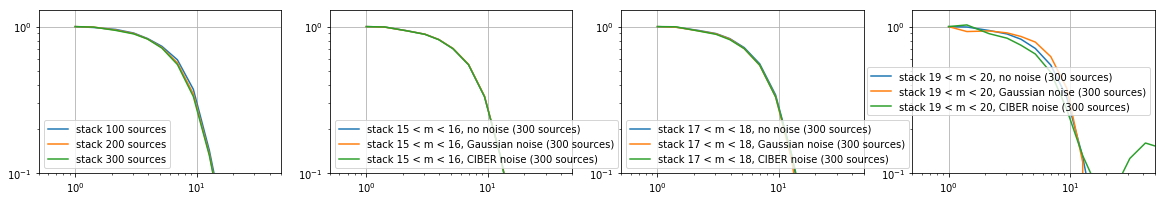

In [72]:
# from srcmap import *
# from mask import *
# from stack import *
# from reduction import *

# def run_test_stack(inst, ifield):

#     data_maps = {1: image_reduction(1), 2: image_reduction(2)}

#     savename = './psf_stack_test'
#     cbmap, strmask, mask_inst = load_processed_images(data_maps, return_names=[(inst,ifield,'cbmap'), 
#                                        (inst,ifield,'strmask'), 
#                                        (inst,ifield,'mask_inst')])
#     sigma_n = np.std(cbmap[strmask*mask_inst==1])
#     make_srcmap_class = make_srcmap(inst, ifield=ifield)

#     profdict = {}


#     Nsrcs = np.array([1,3,5,10,20,50,100,200,300])
#     Nsrc_tot = np.max(Nsrcs)
#     xls = np.random.uniform(-0.5,1023.5, Nsrc_tot)
#     yls = np.random.uniform(511.5, 512.5, Nsrc_tot)
#     m_min_arr = np.array([13,15,17,19])
#     m_max_arr = m_min_arr + 1
#     start_time = time.time()
#     for im, (m_min, m_max) in enumerate(zip(m_min_arr, m_max_arr)):
#         profdict[im] = {}
#         profdict[im]['m_min'] = m_min
#         profdict[im]['m_max'] = m_max
#         profdict[im]['prof'] = {}
#         profdict[im]['profn'] = {}
#         profdict[im]['profcb'] = {}
#         stack_class = stacking_mock(inst, m_min, m_max, ifield=ifield)

#         mags = np.random.uniform(m_min, m_max, Nsrc_tot)
#         stack, stackn, stackcb = 0., 0., 0.
#         for i,(m,x,y) in enumerate(zip(mags,xls,yls)):
#             print('stack %d < m < %d,  %d / %d, t = %2.f min'\
#                   %(m_min, m_max, i, Nsrc_tot,(time.time()-start_time)/60))
#             make_srcmap_class.ms = np.array([m])
#             make_srcmap_class.ms_inband = np.array([m])
#             make_srcmap_class.xls = np.array([x])
#             make_srcmap_class.yls = np.array([y])
#             stack_class.xls = np.array([x])
#             stack_class.yls = np.array([y])

#             srcmap = make_srcmap_class.run_srcmap(ptsrc=True)

#             _, stamp, _, _ = stack_class.run_stacking\
#             (srcmap, np.ones_like(srcmap), np.zeros_like(srcmap), 
#              mask_inst=mask_inst*strmask ,return_all=True, unmask=False)
#             stack += stamp

#             nmap = np.random.normal(scale=sigma_n,size=srcmap.shape)
#             _, stamp, _, _ = stack_class.run_stacking\
#             (srcmap+nmap, np.ones_like(srcmap), np.zeros_like(srcmap),
#              return_all=True, unmask=False, mask_inst=mask_inst*strmask)
#             stackn += stamp

#             _, stamp, _, _ = stack_class.run_stacking\
#             (srcmap+cbmap, np.ones_like(srcmap), np.zeros_like(srcmap),
#              return_all=True, unmask=False, mask_inst=mask_inst*strmask)
#             stackcb += stamp

#             if i+1 in Nsrcs:
#                 profdict[im]['prof'][i+1] = radial_prof(stack/(i+1), stack_class.dx, stack_class.dx)
#                 profdict[im]['profn'][i+1] = radial_prof(stackn/(i+1), stack_class.dx, stack_class.dx)
#                 profdict[im]['profcb'][i+1] = radial_prof(stackcb/(i+1), stack_class.dx, stack_class.dx)

#                 with open(savename, "wb") as f:
#                     pickle.dump(profdict, f)
    
# run_test_stack(1,6)

savename = 'stack_data/psf_stack_test.pkl'
with open(savename, "rb") as f:
    profdict = pickle.load(f)

fig, ax = plt.subplots(1,4, figsize = (20,3))
im = 0
for Nsrc in np.sort(list(profdict[im]['profcb']))[6:]:
    r = profdict[im]['prof'][Nsrc]['rbins']
    p = profdict[im]['prof'][Nsrc]['prof']
    ax[0].loglog(r, p/p[0], label='stack %d sources'%Nsrc)
ax[0].set_xlim([0.5,50])
ax[0].set_ylim([1e-1,1.3])
ax[0].legend()
ax[0].grid()

for im in [1,2,3]:
    Nsrc = np.max(list(profdict[im]['profcb']))
    for typename,printname in zip(['prof', 'profn', 'profcb'],\
                                  ['no noise', 'Gaussian noise', 'CIBER noise']):
        m_min, m_max = profdict[im]['m_min'], profdict[im]['m_max']
        r = profdict[im][typename][Nsrc]['rbins']
        p = profdict[im][typename][Nsrc]['prof']
        ax[im].loglog(r, p/p[0], label='stack %d < m < %d, %s (%d sources)'\
                      %(m_min, m_max, printname, Nsrc))
    ax[im].set_xlim([0.5,50])
    ax[im].set_ylim([1e-1,1.3])
    ax[im].legend()
    ax[im].grid()
plt.savefig('/Users/ytcheng/Desktop/stack_verify.png', dpi = 100, bbox_inches='tight')

***

# Test the Gaia GAL/SQO catalog

https://www2.mpia-hd.mpg.de/~calj/gdr2_class_compressed.pdf

It turns out that GAL/QSO does not offer an extra cleaning compared to SDSS/PS - GAIA match

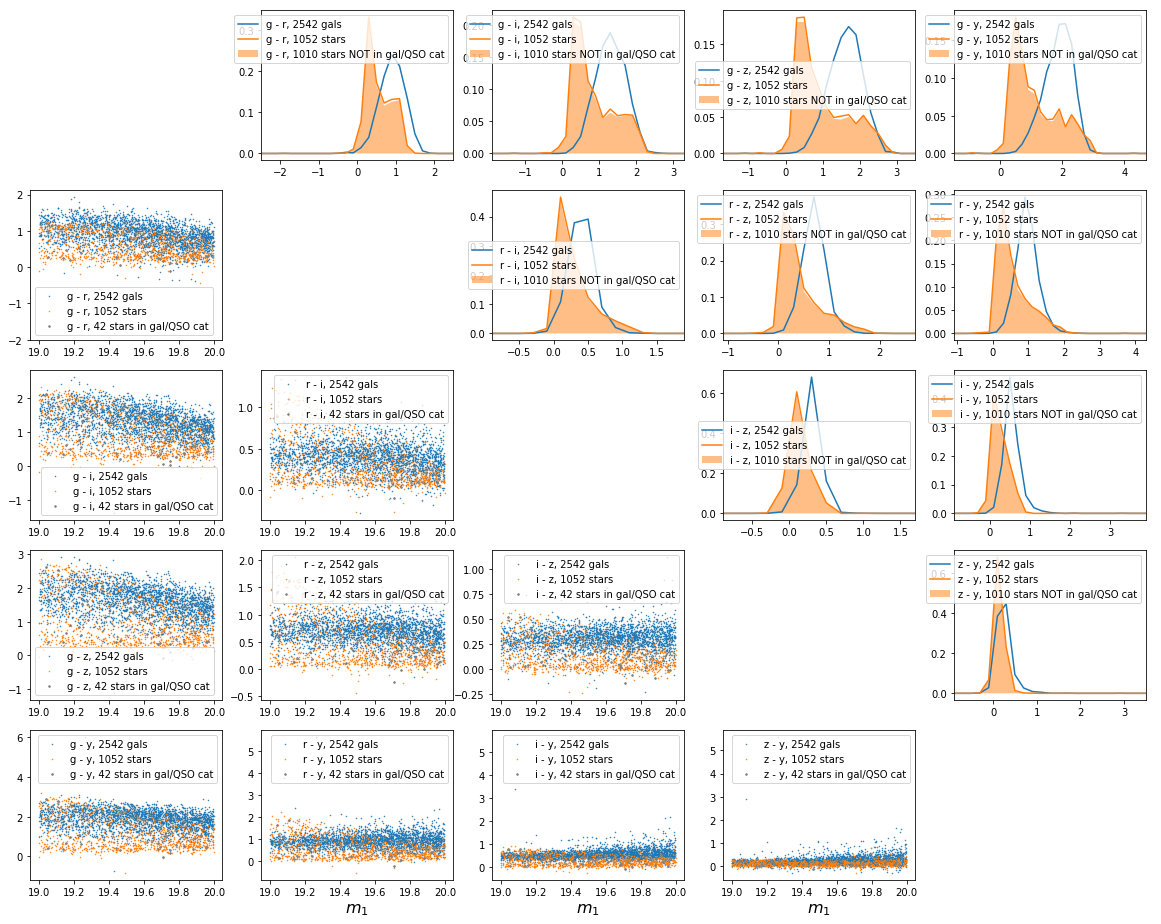

In [64]:
from stack_ancillary import *
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

inst =  1
ifield = 6
mask_inst1, mask_inst2 = \
load_processed_images(data_maps, return_names=[(1,ifield,'mask_inst'),
                                   (2,ifield,'mask_inst')])
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'][3:4],magbindict['m_max'][3:4])):

    srcdat = ps_src_select(inst, ifield, m_min, m_max, 
        [mask_inst1, mask_inst2], gaia_match=True, sample_type='all',gaia_filter_galcat=False)
    df = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
    
    idxs_arr = srcdat['idxs_arr']
    dfs = df.iloc[idxs_arr]
    sps = np.where((dfs['gMeanPSFMag']>0) & (dfs['rMeanPSFMag']>0)\
                   & (dfs['iMeanPSFMag']>0) & (dfs['zMeanPSFMag']>0)\
                   & (dfs['yMeanPSFMag']>0))[0]
    idxs_arr = idxs_arr[sps]
    dfs = dfs.iloc[sps]
    
    idxg_arr = srcdat['idxg_arr']
    dfg = df.iloc[idxg_arr]
    spg = np.where((dfg['gMeanPSFMag']>0) & (dfg['rMeanPSFMag']>0)\
                   & (dfg['iMeanPSFMag']>0) & (dfg['zMeanPSFMag']>0)\
                   & (dfg['yMeanPSFMag']>0))[0]
    dfg = dfg.iloc[spg]
    idxg_arr = idxg_arr[spg]
    
    srcdat_svm = ps_src_select(inst, ifield, m_min, m_max, 
        [mask_inst1, mask_inst2], gaia_match=True, sample_type='all',gaia_filter_galcat=True)
    idxs_rej = np.array([i for i in idxs_arr if i not in srcdat_svm['idxs_arr']])
    dfs_svm = df.iloc[idxs_rej]
    
    plt.close()
    fig, ax = plt.subplots(5, 5, figsize = (20,16))
    for i,c1 in enumerate(['g','r','i','z','y']):
        for j,c2 in enumerate(['g','r','i','z','y']):
            if i>=j:
                ax[i][i].axis('off')
                continue
            m_arr = dfg['I_comb'].values
            c_arr = dfg[c1+'MeanPSFMag'].values - dfg[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            h_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hg_arr = h_arr / len(dfg)
            ax[i][j].plot(hbins, hg_arr, 'C0', label='%s - %s, %d gals'%(c1,c2,len(dfg)))
            ax[j][i].plot(m_arr, c_arr,'.',markersize=1, label='%s - %s, %d gals'%(c1,c2,len(dfg)))

            m_arr = dfs['I_comb'].values
            c_arr = dfs[c1+'MeanPSFMag'].values - dfs[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            h_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hs_arr = h_arr / len(dfs)
            ax[j][i].plot(m_arr, c_arr,'.',markersize=1, label='%s - %s, %d stars'%(c1,c2,len(dfs)))
            ax[i][j].plot(hbins, hs_arr, 'C1', 
                          label='%s - %s, %d stars'%(c1,c2,len(dfs)))
            
            m_arr = dfs_svm['I_comb'].values
            c_arr = dfs_svm[c1+'MeanPSFMag'].values - dfs_svm[c2+'MeanPSFMag'].values
            hbinedges = np.arange(-5,5,0.2)
            hbins = (hbinedges[1:] + hbinedges[:-1])/2
            hr_arr = np.histogram(c_arr,bins=hbinedges)[0]
            hr_arr = hr_arr / len(dfs)

            ax[i][j].fill(hbins, hs_arr-hr_arr, 'C1', alpha=0.5, 
                          label='%s - %s, %d stars NOT in gal/QSO cat'%(c1,c2,len(dfs)-len(dfs_svm)))
            
            ax[j][i].plot(m_arr, c_arr,'.',c='grey',markersize=3,
                          label='%s - %s, %d stars in gal/QSO cat'%(c1,c2,len(dfs_svm)))
            
            sp = np.where((hg_arr + hs_arr)!=0)[0]
            xmin = hbins[np.max([sp[0]-3,0])]
            xmax = hbins[np.min([sp[-1]+3,len(hbins)-1])]
            ax[i][j].set_xlim([xmin,xmax])
            ax[i][j].legend()
            ax[j][i].legend()
            ax[-1][j].set_xlabel('$m_1$', fontsize=16)
            
# plt.savefig('/Users/ytcheng/Desktop/PS_gaia_color_%d_%d.png'%(m_min,m_max),
#             dpi = 200, bbox_inches='tight')

***
# Other PSF tests with WRONG Excess Cov Expression!!!

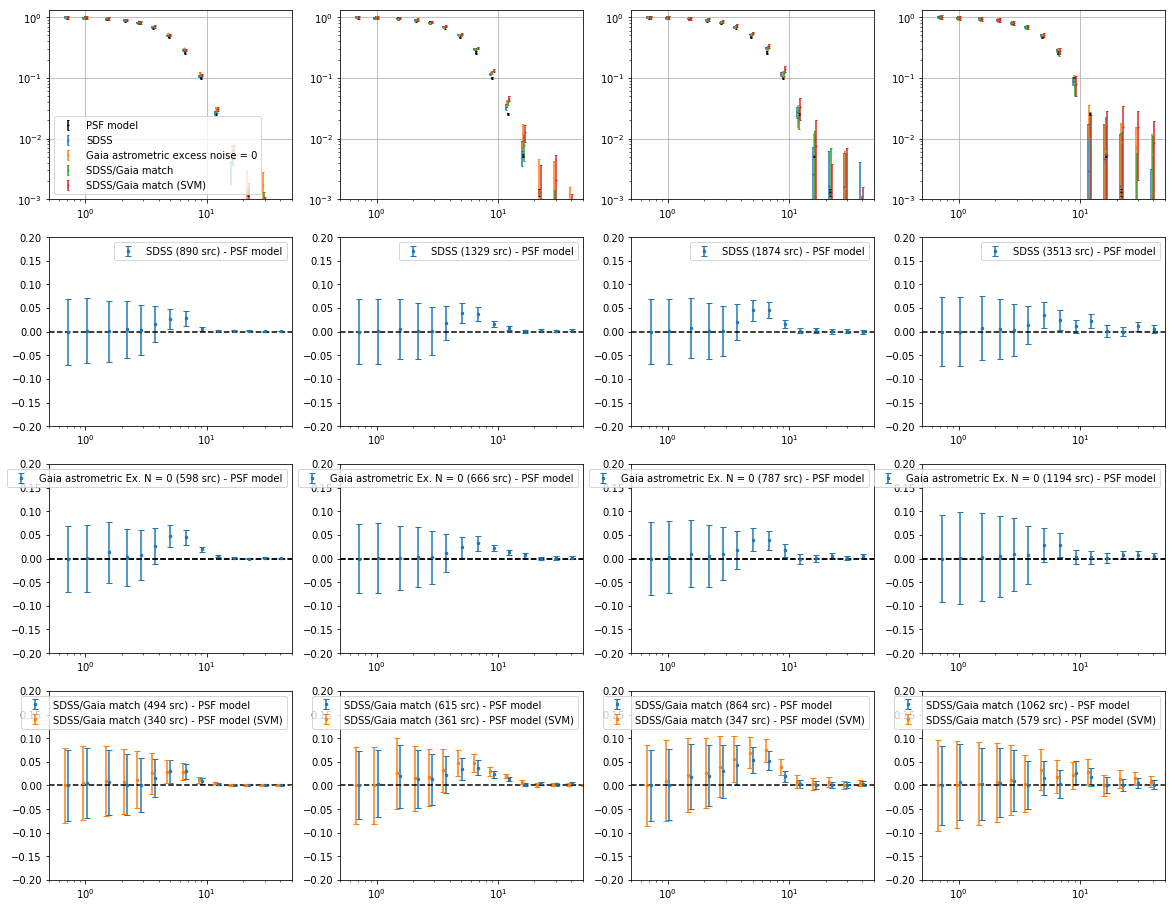

In [59]:
from psfsynth import *

inst =  1
filt_order = filt_order_dict[inst]
ifield = 7
fig, ax = plt.subplots(4, 4, figsize = (20,16))

fname = mypaths['alldat'] + 'TM'+ str(inst) + \
'/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
with open(fname, "rb") as f:
    profdat = pickle.load(f)

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    ax[0][im].set_xscale('log')
    ax[0][im].set_yscale('log')
    ax[1][im].set_xscale('log')
    ax[2][im].set_xscale('log')
    ax[3][im].set_xscale('log')
    ax[0][im].set_xlim([0.5,50])
    ax[0][im].set_ylim([1e-3,1.3])
    ax[1][im].set_xlim([0.5,50])
    ax[1][im].set_ylim([-0.2,0.2])
    ax[2][im].set_xlim([0.5,50])
    ax[2][im].set_ylim([-0.2,0.2])
    ax[3][im].set_xlim([0.5,50])
    ax[3][im].set_ylim([-0.2,0.2])
    
    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat
    errg = np.sqrt(np.diag(stackdat['cov']['profcb'])) / stackdat['profcb'][0]
    Ngal = stackdat['Nsrc']
    
    psfdat = run_psf_combine(inst, ifield, savedata=False)
    psf = psfdat[im]['comb']['profcb']
    psf_err = psfdat[im]['comb']['profcb_err_stack']
    ax[0][im].errorbar(psfdat['rbins'],psf, psf_err, fmt ='.', color='k', capsize=1, 
                    markersize=2, label='PSF model')
    ax[0][im].grid()
    
    prof = profdat[im]['profcb']/profdat[im]['profcb'][0]
    err = profdat[im]['profcb_err']/profdat[im]['profcb'][0]
    N = profdat[im]['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*0.97,prof, err, fmt ='.', color='C0', capsize=1, 
                    markersize=2, label='SDSS')
    ax[1][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5, 
                       label='SDSS (%d src) - PSF model'%N)
    ax[1][im].axhline(0,c='k',ls='--')
    ax[1][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_e.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat1 = pickle.load(f)
    prof = profdat1['profcb']/profdat1['profcb'][0]
    err = profdat1['profcb_err']/profdat1['profcb'][0]
    N = profdat1['Nsrc']
    ax[0][im].errorbar(profdat1['rbins']*0.99,prof, err, fmt ='.', color='C1', capsize=1, 
                    markersize=2, label='Gaia astrometric excess noise = 0')
    ax[2][im].errorbar(profdat1['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='Gaia astrometric Ex. N = 0 (%d src) - PSF model'%N)
    ax[2][im].axhline(0,c='k',ls='--')
    ax[2][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_ps_%s_%d_%d_gaia_match.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdat1 = pickle.load(f)
    prof = profdat1['profcb']/profdat1['profcb'][0]
    err = profdat1['profcb_err']/profdat1['profcb'][0]
    N = profdat1['Nsrc']
    ax[0][im].errorbar(profdat1['rbins']*1.01,prof, err, fmt ='.', color='C2', capsize=1, 
                    markersize=2, label='SDSS/Gaia match')
    ax[3][im].errorbar(profdat1['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='SDSS/Gaia match (%d src) - PSF model'%N)
    ax[3][im].axhline(0,c='k',ls='--')

    ax[2][im].axhline(0,c='k',ls='--')
    ax[2][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_ps_%s_%d_%d_gaia_match_svm.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdat1 = pickle.load(f)
    prof = profdat1['profcb']/profdat1['profcb'][0]
    err = profdat1['profcb_err']/profdat1['profcb'][0]
    N = profdat1['Nsrc']
    ax[0][im].errorbar(profdat1['rbins']*1.03,prof, err, fmt ='.', color='C3', capsize=1, 
                    markersize=2, label='SDSS/Gaia match (SVM)')
    ax[3][im].errorbar(profdat1['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='SDSS/Gaia match (%d src) - PSF model (SVM)'%N)
    ax[3][im].legend()

ax[0][0].legend()
# plt.savefig('/Users/ytcheng/Desktop/PS_stack_filter_svm.png', dpi = 100, bbox_inches='tight')

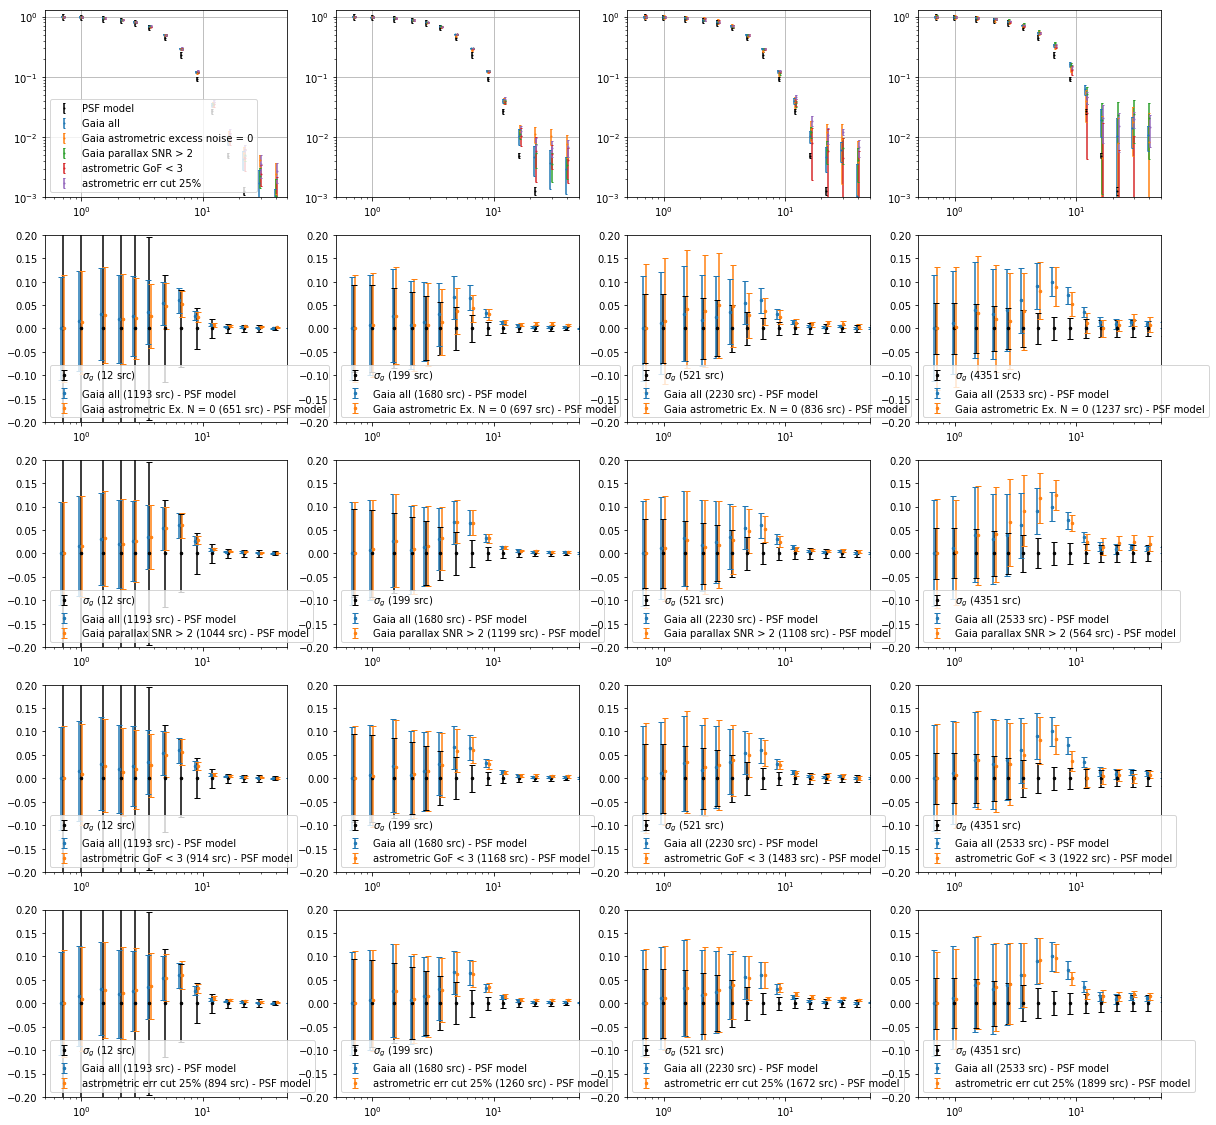

In [13]:
from psfsynth import *

inst =  1
filt_order = filt_order_dict[inst]
ifield = 6
fig, ax = plt.subplots(5, 4, figsize = (20,20))

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    ax[0][im].set_xscale('log')
    ax[0][im].set_yscale('log')
    ax[1][im].set_xscale('log')
    ax[2][im].set_xscale('log')
    ax[3][im].set_xscale('log')
    ax[4][im].set_xscale('log')
    ax[0][im].set_xlim([0.5,50])
    ax[0][im].set_ylim([1e-3,1.3])
    ax[1][im].set_xlim([0.5,50])
    ax[2][im].set_xlim([0.5,50])
    ax[3][im].set_xlim([0.5,50])
    ax[4][im].set_xlim([0.5,50])
    ax[1][im].set_ylim([-0.2,0.2])
    ax[2][im].set_ylim([-0.2,0.2])
    ax[3][im].set_ylim([-0.2,0.2])
    ax[4][im].set_ylim([-0.2,0.2])
    
    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat
    errg = np.sqrt(np.diag(stackdat['cov']['profcb'])) / stackdat['profcb'][0]
    Ngal = stackdat['Nsrc']
    
    ax[1][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[2][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[3][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[4][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    
    psfdat = run_psf_combine(inst, ifield, savedata=False)
    psf = psfdat[im]['comb']['profcb']
    psf_err = psfdat[im]['comb']['profcb_err_stack']
    ax[0][im].errorbar(psfdat['rbins'],psf, psf_err, fmt ='.', color='k', capsize=1, 
                    markersize=2, label='PSF model')
    ax[0][im].grid()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*0.99,prof, err, fmt ='.', color='C0', capsize=1, 
                    markersize=2, label='Gaia all')
    ax[1][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5, 
                       label='Gaia all (%d src) - PSF model'%N)
    ax[2][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5, 
                       label='Gaia all (%d src) - PSF model'%N)
    ax[3][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='Gaia all (%d src) - PSF model'%N)
    ax[4][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='Gaia all (%d src) - PSF model'%N)
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_e.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.01,prof, err, fmt ='.', color='C1', capsize=1, 
                    markersize=2, label='Gaia astrometric excess noise = 0')
    ax[1][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia astrometric Ex. N = 0 (%d src) - PSF model'%N)
    ax[1][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_p2.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.02,prof, err, fmt ='.', color='C2', capsize=1, 
                    markersize=2, label='Gaia parallax SNR > 2')
    ax[2][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia parallax SNR > 2 (%d src) - PSF model'%N)
    ax[2][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_g.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.03,prof, err, fmt ='.', color='C3', capsize=1, 
                    markersize=2, label='astrometric GoF < 3')
    ax[3][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='astrometric GoF < 3 (%d src) - PSF model'%N)
    ax[3][im].legend()

    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_a.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.03,prof, err, fmt ='.', color='C4', capsize=1, 
                    markersize=2, label='astrometric err cut 25%')
    ax[4][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='astrometric err cut 25%% (%d src) - PSF model'%N)
    ax[4][im].legend()
    
ax[0][0].legend()
plt.savefig('/Users/ytcheng/Desktop/gaia_stack_filter.png', dpi = 100, bbox_inches='tight')

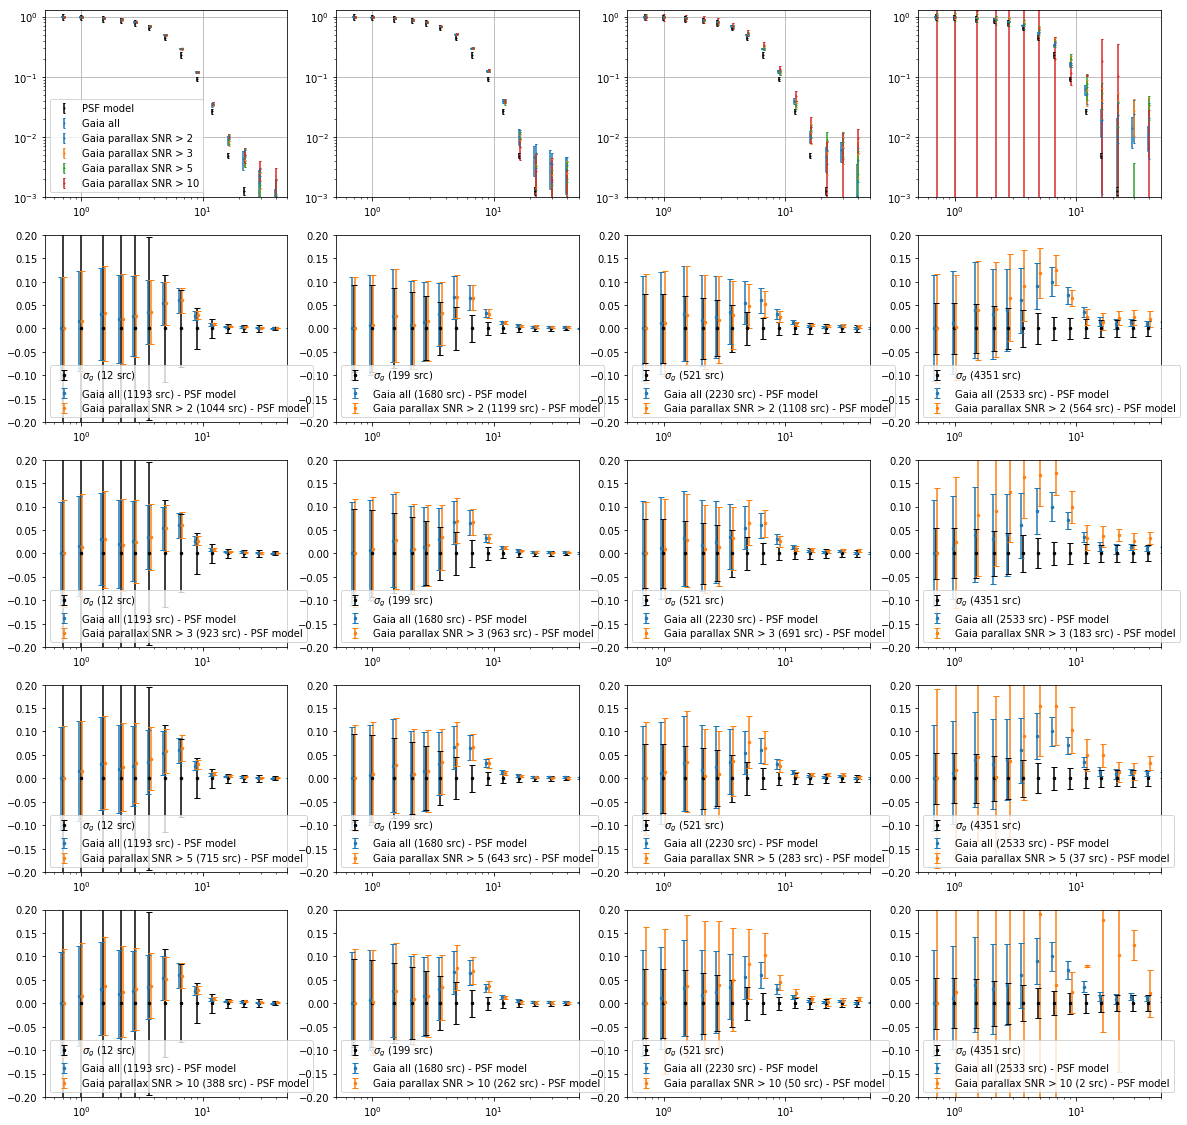

In [46]:
from psfsynth import *

inst =  1
filt_order = filt_order_dict[inst]
ifield = 6
fig, ax = plt.subplots(5, 4, figsize = (20,20))

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    ax[0][im].set_xscale('log')
    ax[0][im].set_yscale('log')
    ax[1][im].set_xscale('log')
    ax[2][im].set_xscale('log')
    ax[3][im].set_xscale('log')
    ax[4][im].set_xscale('log')
    ax[0][im].set_xlim([0.5,50])
    ax[0][im].set_ylim([1e-3,1.3])
    ax[1][im].set_xlim([0.5,50])
    ax[2][im].set_xlim([0.5,50])
    ax[3][im].set_xlim([0.5,50])
    ax[4][im].set_xlim([0.5,50])
    ax[1][im].set_ylim([-0.2,0.2])
    ax[2][im].set_ylim([-0.2,0.2])
    ax[3][im].set_ylim([-0.2,0.2])
    ax[4][im].set_ylim([-0.2,0.2])
    
    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat
    errg = np.sqrt(np.diag(stackdat['cov']['profcb'])) / stackdat['profcb'][0]
    Ngal = stackdat['Nsrc']
    
    ax[1][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[2][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[3][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    ax[4][im].errorbar(stackdat['rbins'], np.zeros_like(stackdat['rbins']), errg,
                       fmt ='.', color='k', capsize=3, markersize=5, label=r'$\sigma_g$ (%d src)'%Ngal)
    
    psfdat = run_psf_combine(inst, ifield, savedata=False)
    psf = psfdat[im]['comb']['profcb']
    psf_err = psfdat[im]['comb']['profcb_err_stack']
    ax[0][im].errorbar(psfdat['rbins'],psf, psf_err, fmt ='.', color='k', capsize=1, 
                    markersize=2, label='PSF model')
    ax[0][im].grid()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*0.99,prof, err, fmt ='.', color='C0', capsize=1, 
                    markersize=2, label='Gaia all')
    ax[1][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5, 
                       label='Gaia all (%d src) - PSF model'%N)
    ax[2][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5, 
                       label='Gaia all (%d src) - PSF model'%N)
    ax[3][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='Gaia all (%d src) - PSF model'%N)
    ax[4][im].errorbar(profdat['rbins']*0.97, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C0', capsize=3, markersize=5,
                       label='Gaia all (%d src) - PSF model'%N)
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_p2.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.02,prof, err, fmt ='.', color='C0', capsize=1, 
                    markersize=2, label='Gaia parallax SNR > 2')
    ax[1][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia parallax SNR > 2 (%d src) - PSF model'%N)
    ax[1][im].legend()
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_p3.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.02,prof, err, fmt ='.', color='C1', capsize=1, 
                    markersize=2, label='Gaia parallax SNR > 3')
    ax[2][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia parallax SNR > 3 (%d src) - PSF model'%N)
    ax[2][im].legend()

    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_p5.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.02,prof, err, fmt ='.', color='C2', capsize=1, 
                    markersize=2, label='Gaia parallax SNR > 5')
    ax[3][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia parallax SNR > 5 (%d src) - PSF model'%N)
    ax[3][im].legend()

    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d_p10.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    prof = profdat['profcb']/profdat['profcb'][0]
    err = profdat['profcb_err']/profdat['profcb'][0]
    N = profdat['Nsrc']
    ax[0][im].errorbar(profdat['rbins']*1.02,prof, err, fmt ='.', color='C3', capsize=1, 
                    markersize=2, label='Gaia parallax SNR > 10')
    ax[4][im].errorbar(profdat['rbins']*1.03, np.abs(prof-psf), np.sqrt(err**2+psf_err**2),
                       fmt ='.', color='C1', capsize=3, markersize=5,
                       label='Gaia parallax SNR > 10 (%d src) - PSF model'%N)
    ax[4][im].legend()

ax[0][0].legend()
plt.savefig('/Users/ytcheng/Desktop/gaia_stack_filter_p.png', dpi = 100, bbox_inches='tight')

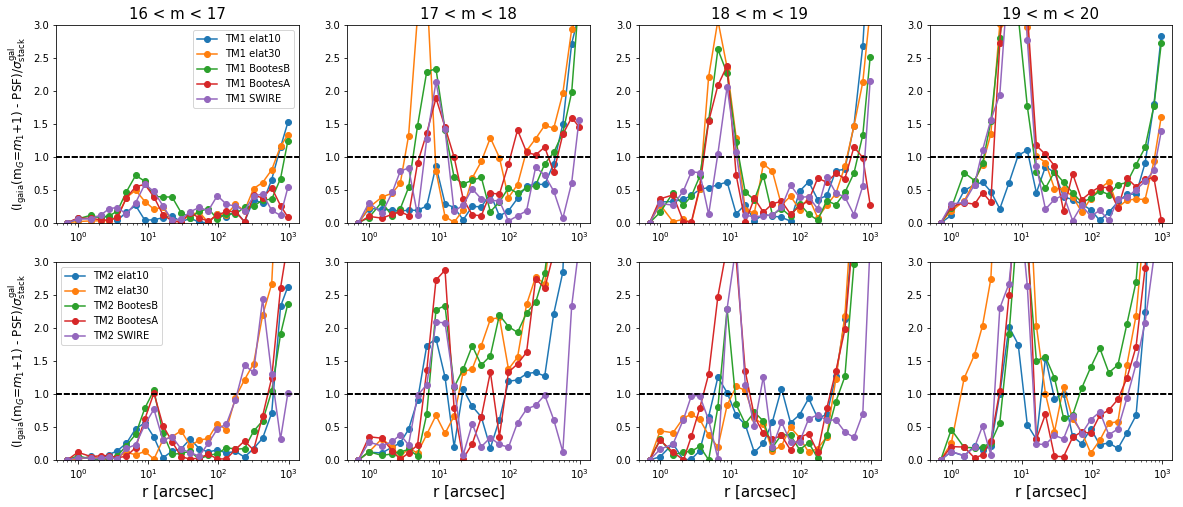

In [12]:
from psfsynth import *

fig, ax = plt.subplots(2, 4, figsize = (20,8))
for inst in [1,2]:
    filt_order = filt_order_dict[inst]
    for ifield  in [4,5,6,7,8]:
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                        load_from_file=True, BGsub=False).stackdat
            errg = np.sqrt(np.diag(stackdat['cov']['profcb'])) / stackdat['profcb'][0]

            psfdat = run_psf_combine(inst, ifield, savedata=False)

            fname = mypaths['alldat'] + 'TM'+ str(inst) +\
             '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min+1, m_max+1)
            with open(fname, "rb") as f:
                profdat = pickle.load(f)  
            errpsf = np.abs(profdat['profcb']/profdat['profcb'][0] - psfdat[im]['comb']['profcb'])
            ax[inst-1][im].semilogx(profdat['rbins'],errpsf/errg, 'o-', 
                                    label='TM%d '%inst + fieldnamedict[ifield])
            ax[inst-1][im].set_ylim([0,3])
            ax[inst-1][im].axhline(1,c='k',ls='--')
            ax[1][im].set_xlabel('r [arcsec]',fontsize=15)
            ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[inst-1][0].legend()
    ax[inst-1][0].set_ylabel(r'(I$_{\rm gaia}$(m$_G$=$m_1$+1) - PSF)/$\sigma^{\rm gal}_{\rm stack}$',
                        fontsize=12)
plt.savefig('/Users/ytcheng/Desktop/gaia_sys_err.png', dpi = 100, bbox_inches='tight')